In [10]:
# Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄÏö© ‚Äì Colab ÌïúÏ†ï). Ï∞®Ìä∏ Ï∂úÎ†• Ï†Ñ ÎØ∏Î¶¨ Ïã§ÌñâÌï¥Ïïº Ìï®!!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# Ïã§Ìñâ ÌõÑ ÏÑ∏ÏÖò Îã§ÏãúÏãúÏûë

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/opentype/noto: caching, new cache contents: 30 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/opentype: skipping, looped directory detected
/usr/share/fonts/truetyp

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# Ïö¥ÏòÅÏ≤¥Ï†úÎ≥Ñ Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'   # ÏúàÎèÑÏö∞ Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
elif platform.system() == 'Darwin':  # macOS
    font_name = 'AppleGothic'
else:  # Linux (Ïòà: Ubuntu, WSL Îì±)
    font_name = 'NanumGothic'

rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
print(f"‚úÖ ÌòÑÏû¨ Ï†ÅÏö©Îêú Ìè∞Ìä∏: {font_name}")

‚úÖ ÌòÑÏû¨ Ï†ÅÏö©Îêú Ìè∞Ìä∏: NanumGothic


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
# ÏÇ¨Ïö©ÌïòÎäî ÌôòÍ≤ΩÏóê Îî∞Îùº Ï£ºÏÑùÏ≤òÎ¶¨ Ìï¥ÏÑú ÏÇ¨Ïö©
# df = pd.read_csv("C:/Users/user/ai_job/ai_job_market.csv") # Ï£ºÌîºÌÑ∞ Ïö©
df = pd.read_csv("/content/ai_job_market.csv") # ÏΩîÎû© Ïö©
# ÏΩîÎû©ÏóêÏÑú ÏÇ¨Ïö©Ìï†ÎïåÎäî csvÌååÏùº ÏóÖÎ°úÎìú Ìï¥Ï£ºÏÖîÏïº Ìï©ÎãàÎã§.

# Ï†ÑÏ≤òÎ¶¨
'''
Ïª¨Îüº ÏßÄÏ†ï, salary_range_usd "-" Îí§Ïùò Í∞í ÏÇ≠Ï†ú, posted_date ÎÇ†Ïßú ÏÇ≠Ï†ú, location ','ÏïûÏùò Í∞í ÏÇ≠Ï†ú(ÎèÑÏãú Ï†úÍ±∞),
skills_required, tools_preferred Î¶¨Ïä§Ìä∏ Ìôî, experience_level, employment_type, company_size ÏΩîÎìú ÏßÄÏ†ï
'''
# ÏÇ¨Ïö©Ìï† Ïª¨Îüº ÏßÄÏ†ï
use_cols = (['industry', 'job_title', 'skills_required',
       'experience_level', 'employment_type', 'location', 'salary_range_usd',
       'posted_date', 'company_size', 'tools_preferred'])
df = df[use_cols].copy()

# salary_range_usd "-" Îí§Ïùò Í∞í ÏÇ≠Ï†ú - ÏïûÏùò Ïà´Ïûê Ï¥àÎ¥âÏù¥Îùº Í∞ÄÏ†ï
df['salary_range_usd'] = df['salary_range_usd'].str.replace('-[^-]*$', '', regex=True)

# posted_date ÎÇ†Ïßú ÏÇ≠Ï†ú
df['posted_date'] = df['posted_date'].str.replace('-[^-]*$', '', regex=True)

# location ','ÏïûÏùò Í∞í ÏÇ≠Ï†ú(ÎèÑÏãú Ï†úÍ±∞)
df['location'] = df['location'].str.replace('.*,', '', regex=True)

# # skills_required Î¶¨Ïä§Ìä∏ Ìôî
# df['skills_required'] = (
#     df['skills_required']
#     .dropna()       # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
#     .apply(lambda x: [skill.strip() for skill in x.split(',')])  # Í≥µÎ∞± Ï†úÍ±∞ ÌõÑ Î¶¨Ïä§Ìä∏Ìôî
# )

# tools_preferred Î¶¨Ïä§Ìä∏ Ìôî
df['tools_preferred'] = (
    df['tools_preferred']
    .dropna()       # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    .apply(lambda x: [skill.strip() for skill in x.split(',')])  # Í≥µÎ∞± Ï†úÍ±∞ ÌõÑ Î¶¨Ïä§Ìä∏Ìôî
)

# experience_level ÏΩîÎìúÌôî {Entry(Ïã†ÏûÖ): 0, Mid(Í≤ΩÎ†•): 1, Senior(ÏãúÎãàÏñ¥): 3}
df["experience_level"] = df["experience_level"].map({"Entry": 0, "Mid": 1, 'Senior': 2})

# employment_type ÏΩîÎìúÌôî {Contract(Í≥ÑÏïΩÏßÅ): 0, Remote(ÌîÑÎ¶¨Î†åÏÑú): 1, Internship(Ïù∏ÌÑ¥Ïã≠): 2, , Full-time(Ï†ïÍ∑úÏßÅ): 3}
df["employment_type"] = df["employment_type"].map({"Contract": 0, "Remote": 1, 'Internship': 2, 'Full-time': 3})

# company_size ÏΩîÎìúÌôî {Startup(Ïä§ÌÉÄÌä∏ÏóÖ): 0, Mid(Ï§ëÏÜåÍ∏∞ÏóÖ): 1, Large(ÎåÄÍ∏∞ÏóÖ): 2}
df["company_size"] = df["company_size"].map({"Startup": 0, "Mid": 1, 'Large': 2})

df

industry                 job_title  \
0     Healthcare              Data Analyst   
1           Tech  Computer Vision Engineer   
2           Tech          Quant Researcher   
3           Tech        AI Product Manager   
4        Finance            Data Scientist   
...          ...                       ...   
1995     Finance              NLP Engineer   
1996  Automotive        AI Product Manager   
1997   Education              Data Analyst   
1998   Education          Quant Researcher   
1999     Finance          Quant Researcher   

                                        skills_required  experience_level  \
0     NumPy, Reinforcement Learning, PyTorch, Scikit...                 1   
1                       Scikit-learn, CUDA, SQL, Pandas                 2   
2             MLflow, FastAPI, Azure, PyTorch, SQL, GCP                 0   
3          Scikit-learn, C++, Pandas, LangChain, AWS, R                 1   
4                       Excel, Keras, SQL, Hugging Face                 2   
...                                                 ...               ...   
1995                           Flask, FastAPI, Power BI                 2   
1996           R, Flask, Excel, C++, CUDA, Scikit-learn                 1   
1997       Hugging Face, Excel, Scikit-learn, R, MLflow                 0   
1998                          AWS, Python, Scikit-learn                 2   
1999                        Flask, TensorFlow, Power BI                 2   

      employment_type location salary_range_usd posted_date  company_size  \
0                   3       AR            92860     2025-08             2   
1                   3       CU            78523     2024-03             2   
2                   3       CM           124496     2025-09             2   
3                   3       FI            50908     2024-05             2   
4                   0       NE            98694     2025-02             2   
...               ...      ...              ...         ...           ...   
1995                2       SD            90382     2024-04             2   
1996                1       ZA            47848     2023-12             2   
1997                0       CG           134994     2023-10             2   
1998                0       OM            62388     2024-08             2   
1999                3       NE            55835     2025-02             0   

                        tools_preferred  
0                     [KDB+, LangChain]  
1           [FastAPI, KDB+, TensorFlow]  
2     [BigQuery, PyTorch, Scikit-learn]  
3        [TensorFlow, BigQuery, MLflow]  
4                  [PyTorch, LangChain]  
...                                 ...  
1995                           [MLflow]  
1996          [KDB+, LangChain, MLflow]  
1997                          [PyTorch]  
1998      [MLflow, TensorFlow, FastAPI]  
1999                           [MLflow]  

[2000 rows x 10 columns]

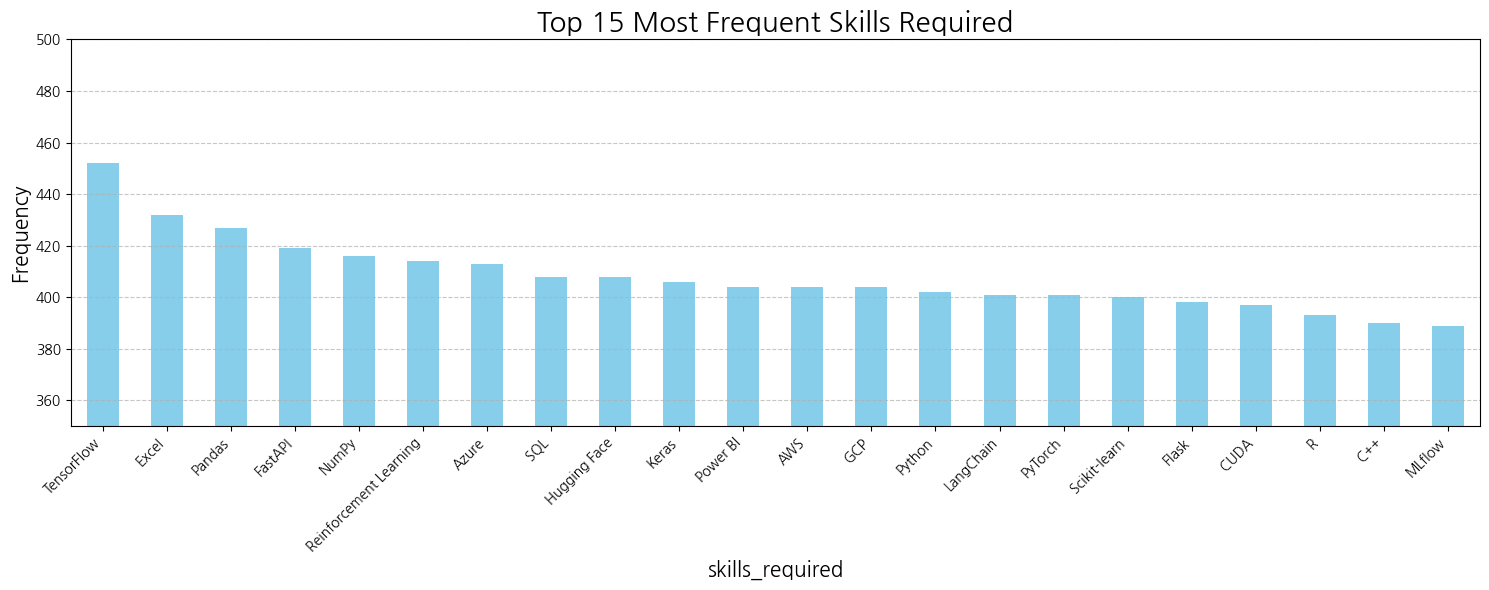

In [54]:
skills_series = (
    df['skills_required']
    .dropna()
    .str.split(',')          # ÏΩ§Îßà Í∏∞Ï§Ä Î∂ÑÎ¶¨
    .explode()               # Î¶¨Ïä§Ìä∏ ÌíÄÍ∏∞
    .str.strip()             # Í≥µÎ∞± Ï†úÍ±∞
)

# Í∏∞Ïà†Î≥Ñ Îì±Ïû• ÌöüÏàò Í≥ÑÏÇ∞
skill_counts = skills_series.value_counts()

# ÏÉÅÏúÑ 15Í∞ú Í∏∞Ïà†Îßå ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15,6))
skill_counts.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Frequent Skills Required', fontsize=20)
plt.xlabel('skills_required', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(350,500)
plt.tight_layout()
plt.show()

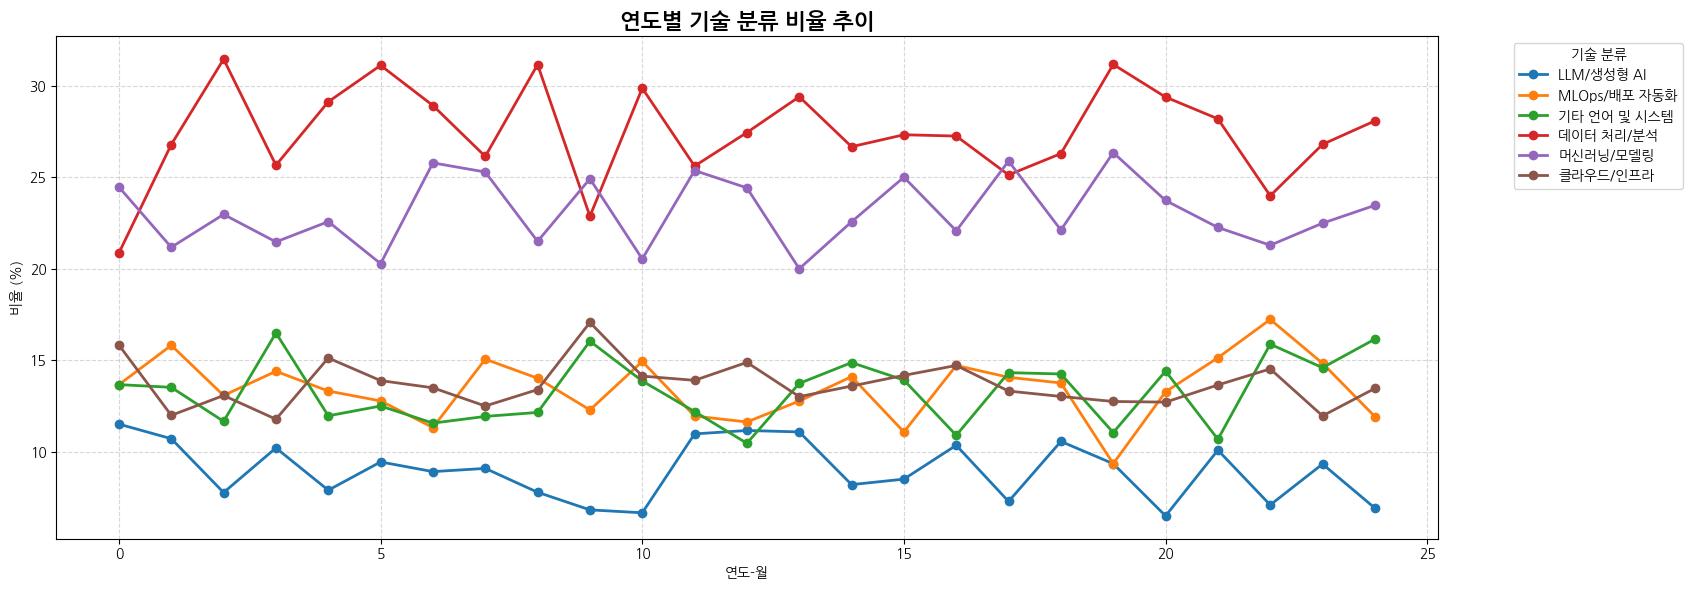

In [55]:
# -------------------------------
#  Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨
# -------------------------------
# df = pd.read_csv("/content/ai_job_market.csv")  # ÏΩîÎû© Í∏∞Ï§Ä


# Ïó∞ÎèÑ Ï∂îÏ∂ú
df['year'] = df['posted_date'].str[:4]
df['year_month'] = pd.to_datetime(df['posted_date']).dt.to_period('M').astype(str)

# tools_preferred Î∂ÑÎ¶¨ Î∞è ÌôïÏû•
df['skills_required'] = df['skills_required'].apply(lambda x: [t.strip() for t in x.split(',')])
df_exploded = df.explode('skills_required')

# -------------------------------
#  Í∏∞Ïà† Î∂ÑÎ•ò Îß§Ìïë
# -------------------------------
category_map = {
    # Î®∏Ïã†Îü¨Îãù / Î™®Îç∏ÎßÅ
    "Scikit-learn": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",
    "TensorFlow": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",
    "PyTorch": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",
    "Keras": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",
    "Reinforcement Learning": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",

    # Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ / Î∂ÑÏÑù
    "Pandas": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "NumPy": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "SQL": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "Excel": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "Power BI": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "R": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",

    # ÌÅ¥ÎùºÏö∞Îìú / Ïù∏ÌîÑÎùº
    "AWS": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",
    "GCP": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",
    "Azure": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",
    "BigQuery": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",
    "KDB+": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",

    # MLOps / Î∞∞Ìè¨ ÏûêÎèôÌôî
    "MLflow": "MLOps/Î∞∞Ìè¨ ÏûêÎèôÌôî",
    "Docker": "MLOps/Î∞∞Ìè¨ ÏûêÎèôÌôî",
    "FastAPI": "MLOps/Î∞∞Ìè¨ ÏûêÎèôÌôî",
    "Flask": "MLOps/Î∞∞Ìè¨ ÏûêÎèôÌôî",

    # LLM / ÏÉùÏÑ±Ìòï AI
    "LangChain": "LLM/ÏÉùÏÑ±Ìòï AI",
    "Hugging Face": "LLM/ÏÉùÏÑ±Ìòï AI",

    # Í∏∞ÌÉÄ Ïñ∏Ïñ¥ Î∞è ÏãúÏä§ÌÖú
    "C++": "Í∏∞ÌÉÄ Ïñ∏Ïñ¥ Î∞è ÏãúÏä§ÌÖú",
    "CUDA": "Í∏∞ÌÉÄ Ïñ∏Ïñ¥ Î∞è ÏãúÏä§ÌÖú",
    "Python": "Í∏∞ÌÉÄ Ïñ∏Ïñ¥ Î∞è ÏãúÏä§ÌÖú"
}

df_exploded['category'] = df_exploded['skills_required'].map(category_map)
df_exploded = df_exploded.dropna(subset=['category'])

# -------------------------------
#  Ïó∞ÎèÑ-ÏõîÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨ ÎπÑÏú® Í≥ÑÏÇ∞
# -------------------------------
pivot_data = (
    df_exploded.groupby(['year_month', 'category'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .unstack(fill_value=0)
)
pivot_data = pivot_data.reset_index(drop=True)



# -------------------------------
#  Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
# -------------------------------
plt.figure(figsize=(17, 6))
for col in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[col], marker='o', linewidth=2, label=col)

plt.title("Ïó∞ÎèÑÎ≥Ñ Í∏∞Ïà† Î∂ÑÎ•ò ÎπÑÏú® Ï∂îÏù¥", fontsize=16, weight='bold')
plt.xlabel("Ïó∞ÎèÑ-Ïõî")
plt.ylabel("ÎπÑÏú® (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Í∏∞Ïà† Î∂ÑÎ•ò", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


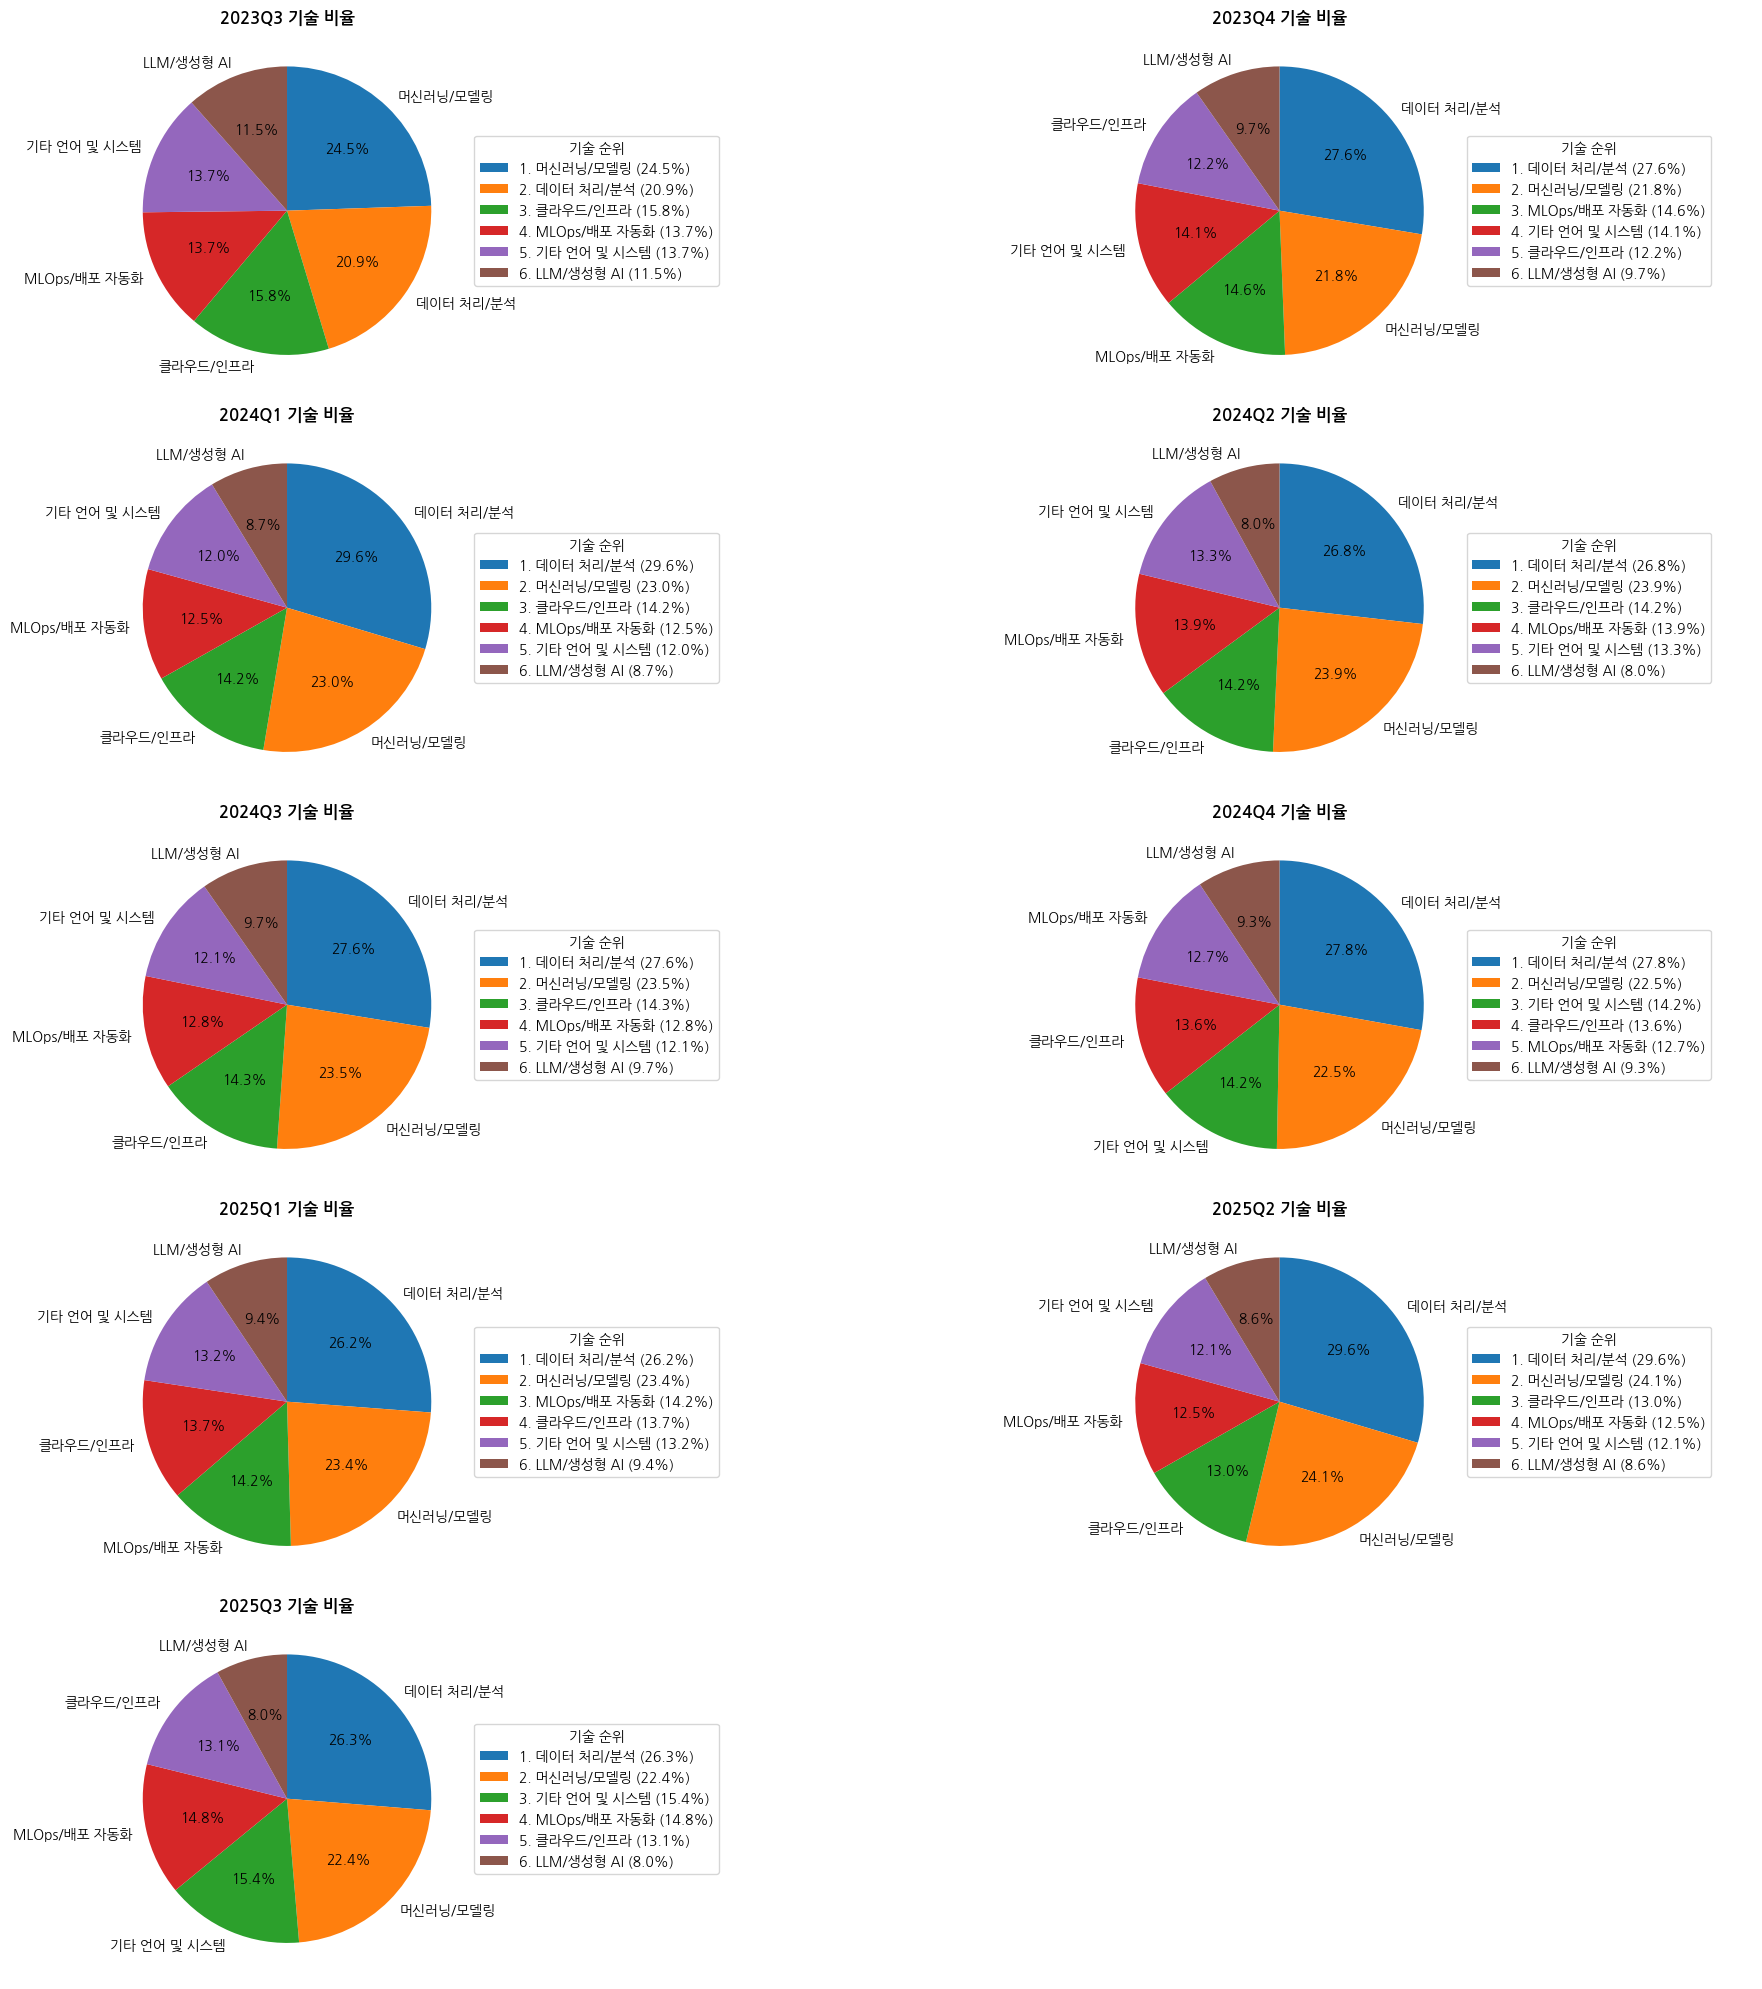

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1Ô∏è‚É£ ÎÇ†ÏßúÌòï Î≥ÄÌôò Î∞è Î∂ÑÍ∏∞ ÏÉùÏÑ±
# -------------------------------
df_exploded['posted_date'] = pd.to_datetime(df_exploded['posted_date'], errors='coerce')
df_exploded = df_exploded.dropna(subset=['posted_date'])
df_exploded['year_quarter'] = df_exploded['posted_date'].dt.to_period('Q').astype(str)

# -------------------------------
# 2Ô∏è‚É£ Ïπ¥ÌÖåÍ≥†Î¶¨ Îß§Ìïë
# -------------------------------
category_map = {
    "Scikit-learn": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",
    "TensorFlow": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",
    "PyTorch": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",
    "Keras": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",
    "Reinforcement Learning": "Î®∏Ïã†Îü¨Îãù/Î™®Îç∏ÎßÅ",
    "Pandas": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "NumPy": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "SQL": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "Excel": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "Power BI": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "R": "Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨/Î∂ÑÏÑù",
    "AWS": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",
    "GCP": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",
    "Azure": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",
    "BigQuery": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",
    "KDB+": "ÌÅ¥ÎùºÏö∞Îìú/Ïù∏ÌîÑÎùº",
    "MLflow": "MLOps/Î∞∞Ìè¨ ÏûêÎèôÌôî",
    "Docker": "MLOps/Î∞∞Ìè¨ ÏûêÎèôÌôî",
    "FastAPI": "MLOps/Î∞∞Ìè¨ ÏûêÎèôÌôî",
    "Flask": "MLOps/Î∞∞Ìè¨ ÏûêÎèôÌôî",
    "LangChain": "LLM/ÏÉùÏÑ±Ìòï AI",
    "Hugging Face": "LLM/ÏÉùÏÑ±Ìòï AI",
    "C++": "Í∏∞ÌÉÄ Ïñ∏Ïñ¥ Î∞è ÏãúÏä§ÌÖú",
    "CUDA": "Í∏∞ÌÉÄ Ïñ∏Ïñ¥ Î∞è ÏãúÏä§ÌÖú",
    "Python": "Í∏∞ÌÉÄ Ïñ∏Ïñ¥ Î∞è ÏãúÏä§ÌÖú"
}
df_exploded['category'] = df_exploded['skills_required'].map(category_map)
df_exploded = df_exploded.dropna(subset=['category'])

pivot_data.index = pivot_data.index.map(lambda x: x[0] if isinstance(x, tuple) else x)
# -------------------------------
# 3Ô∏è‚É£ Î∂ÑÍ∏∞Î≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
# -------------------------------
pivot_data = (
    df_exploded.groupby(['year_quarter', 'category'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .unstack(fill_value=0)
)

pivot_data.index = pivot_data.index.map(lambda x: x[0] if isinstance(x, tuple) else x)

# -------------------------------
# 4Ô∏è‚É£ ÌååÏù¥Ï∞®Ìä∏ + ÏàúÏúÑ Î≤îÎ°Ä ÌëúÏãú
# -------------------------------
quarters = sorted(pivot_data.index)
fig, axes = plt.subplots(len(quarters)//4 + 3, 2, figsize=(20, 20))
axes = axes.flatten()

for i, quarter in enumerate(quarters):
    data = pivot_data.loc[quarter].sort_values(ascending=False)
    wedges, texts, autotexts = axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )

    # ‚úÖ Î≤îÎ°ÄÏö© ÏàúÏúÑ ÌÖçÏä§Ìä∏ ÏÉùÏÑ±
    rank_text = [f"{idx+1}. {cat} ({val:.1f}%)" for idx, (cat, val) in enumerate(data.items())]

    # ‚úÖ ÌååÏù¥Ï∞®Ìä∏ Ïò§Î•∏Ï™ΩÏóê Î≤îÎ°Ä ÌëúÏãú
    axes[i].legend(
        rank_text,
        title="Í∏∞Ïà† ÏàúÏúÑ",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )

    axes[i].set_title(f"{quarter} Í∏∞Ïà† ÎπÑÏú®", fontsize=12, weight='bold')

# ÎÇ®Îäî ÎπàÏπ∏ ÎπÑÌôúÏÑ±Ìôî
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



üìå ÎåÄÌëú 5Í∞ú Íµ≠Í∞Ä (KR Ìè¨Ìï®):
High Salary: ['EE', 'LV', 'SK', 'RS', 'GE']
Mid Salary: ['DZ', 'IS', 'UA', 'TR', 'SE']
Low Salary: ['RU', 'BJ', 'SI', 'MW', 'GH']

üí° ÎåÄÌëú Í∏∞Ïà† ÏÉÅÏúÑ 2Í∞ú:
High Salary: Scikit-learn, Azure
Mid Salary: TensorFlow, SQL
Low Salary: Excel, TensorFlow


/tmp/ipython-input-1320018008.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


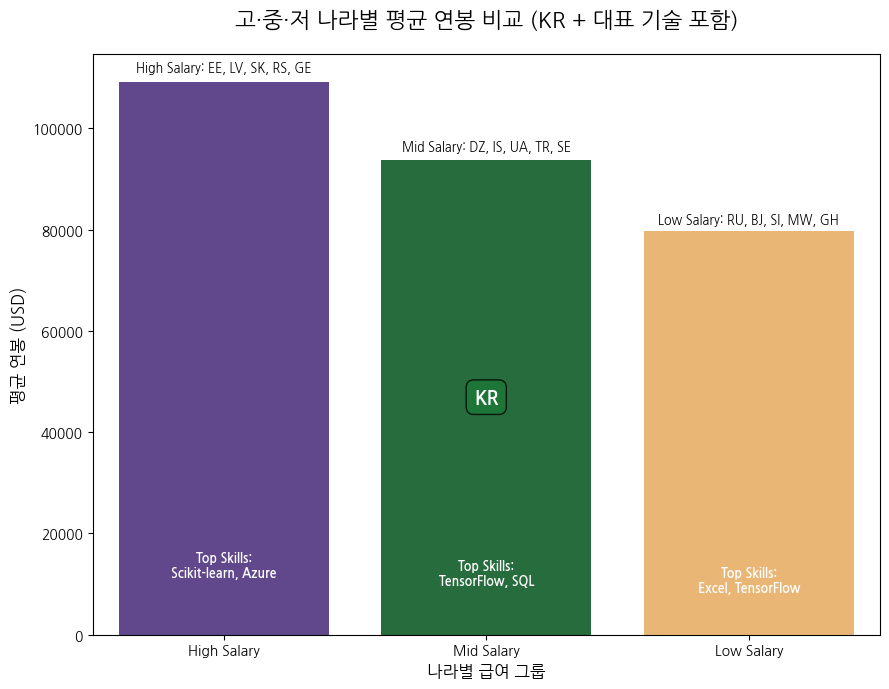

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm
import os
import re

# =====================================================
# ‚úÖ [2] Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨
# =====================================================
df = pd.read_csv("ai_job_market.csv")

# üîπ locationÏóêÏÑú Íµ≠Í∞Ä ÏΩîÎìúÎßå Ï∂îÏ∂ú (Ïòà: "Tracybury, AR" ‚Üí "AR")
df['location'] = df['location'].astype(str).apply(lambda x: x.split(',')[-1].strip() if ',' in x else x.strip())

# üîπ salary_range_usdÏóêÏÑú Ïïû Ïà´ÏûêÎßå Ï∂îÏ∂ú (Ïòà: "92860-109598" ‚Üí 92860)
def extract_min_salary(s):
    if pd.isna(s):
        return None
    match = re.match(r'(\d+)', str(s))
    return int(match.group(1)) if match else None

df['salary_range_usd'] = df['salary_range_usd'].apply(extract_min_salary)

# =====================================================
# ‚úÖ [3] Íµ≠Í∞ÄÎ≥Ñ ÌèâÍ∑† Ïó∞Î¥â Í≥ÑÏÇ∞ Î∞è KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
# =====================================================
country_salary = df.groupby('location')['salary_range_usd'].mean().reset_index()
country_salary.columns = ['country', 'avg_salary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_salary[['avg_salary']])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
country_salary['cluster'] = kmeans.fit_predict(X_scaled)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ïó∞Î¥â Í≥ÑÏÇ∞
cluster_mean = country_salary.groupby('cluster')['avg_salary'].mean().reset_index()
cluster_mean = cluster_mean.sort_values('avg_salary', ascending=False).reset_index(drop=True)
cluster_mean['group'] = ['High Salary', 'Mid Salary', 'Low Salary']

# ÌÅ¥Îü¨Ïä§ÌÑ∞ ‚Üí Í∑∏Î£π Îß§Ìïë
cluster_to_group = dict(zip(cluster_mean['cluster'], cluster_mean['group']))
country_salary['salary_group'] = country_salary['cluster'].map(cluster_to_group)

# =====================================================
# ‚úÖ [4] KR ÎàÑÎùΩ Ïãú Í∞ïÏ†ú Ï∂îÍ∞Ä
# =====================================================
if 'KR' not in country_salary['country'].values:
    kr_avg = df['salary_range_usd'].mean()
    kr_row = pd.DataFrame([{'country': 'KR', 'avg_salary': kr_avg, 'salary_group': 'Mid Salary'}])
    country_salary = pd.concat([country_salary, kr_row], ignore_index=True)

# =====================================================
# ‚úÖ [5] Í∞Å Í∑∏Î£πÎ≥Ñ ÎåÄÌëú 5Í∞ú Íµ≠Í∞Ä (KR Ìè¨Ìï®)
# =====================================================
representatives = {}
for group in ['High Salary', 'Mid Salary', 'Low Salary']:
    subset = country_salary[country_salary['salary_group'] == group]
    if subset.empty:
        continue

    if group == 'Low Salary':
        reps = subset.sort_values('avg_salary', ascending=True).head(5)
    else:
        reps = subset.sort_values('avg_salary', ascending=False).head(5)

    # KR Ìè¨Ìï® Î≥¥Ïû•
    if group == 'Mid Salary' and 'KR' not in reps['country'].values:
        kr_row = subset[subset['country'] == 'KR']
        reps = pd.concat([reps, kr_row]).drop_duplicates('country').head(5)

    representatives[group] = reps['country'].tolist()

print("\nüìå ÎåÄÌëú 5Í∞ú Íµ≠Í∞Ä (KR Ìè¨Ìï®):")
for group, countries in representatives.items():
    print(f"{group}: {countries}")

# =====================================================
# ‚úÖ [6] Í∞Å Í∑∏Î£πÎ≥Ñ ÎåÄÌëú Í∏∞Ïà†(skill) 2Í∞ú Ï∂îÏ∂ú
# =====================================================
skill_summary = {}

if 'skills_required' in df.columns:
    df['skills_required'] = df['skills_required'].fillna("")
    df_expanded = df.assign(skill=df['skills_required'].str.split(',')).explode('skill')
    df_expanded['skill'] = df_expanded['skill'].str.strip()

    for group in ['High Salary', 'Mid Salary', 'Low Salary']:
        group_countries = country_salary[country_salary['salary_group'] == group]['country']
        group_df = df_expanded[df_expanded['location'].isin(group_countries)]
        top_skills = (
            group_df['skill']
            .value_counts()
            .head(2)
            .index
            .tolist()
        )
        skill_summary[group] = ", ".join(top_skills)
else:
    skill_summary = {g: "N/A" for g in ['High Salary', 'Mid Salary', 'Low Salary']}

print("\nüí° ÎåÄÌëú Í∏∞Ïà† ÏÉÅÏúÑ 2Í∞ú:")
for group, skills in skill_summary.items():
    print(f"{group}: {skills}")

# =====================================================
# ‚úÖ [7] ÏãúÍ∞ÅÌôî
# =====================================================
plt.figure(figsize=(9, 7))
bar_colors = ['#5e3c99', '#1b7837', '#fdb863']

sns.barplot(
    x='group',
    y='avg_salary',
    data=cluster_mean,
    palette=bar_colors
)

plt.title("Í≥†¬∑Ï§ë¬∑Ï†Ä ÎÇòÎùºÎ≥Ñ ÌèâÍ∑† Ïó∞Î¥â ÎπÑÍµê (KR + ÎåÄÌëú Í∏∞Ïà† Ìè¨Ìï®)", fontsize=16, pad=20)
plt.xlabel("ÎÇòÎùºÎ≥Ñ Í∏âÏó¨ Í∑∏Î£π", fontsize=12)
plt.ylabel("ÌèâÍ∑† Ïó∞Î¥â (USD)", fontsize=12)

# -----------------------------
# ÏÉÅÎã®Ïóê ÎåÄÌëú Íµ≠Í∞Ä ÌëúÏãú
# -----------------------------
for i, row in cluster_mean.iterrows():
    group = row['group']
    reps = ", ".join(representatives.get(group, []))
    plt.text(
        i, row['avg_salary'] + (row['avg_salary'] * 0.02),
        f"{group}: {reps}",
        ha='center', fontsize=9, color='black'
    )

# -----------------------------
# Ï§ëÏïôÏóê KR Í∞ïÏ°∞ (Mid Salary)
# -----------------------------
mid_row = cluster_mean[cluster_mean['group'] == 'Mid Salary']
if not mid_row.empty:
    i = mid_row.index[0]
    y = mid_row['avg_salary'].values[0]
    plt.text(
        i, y / 2,
        "KR",
        ha='center', va='center',
        fontsize=14, fontweight='bold', color='white',
        bbox=dict(facecolor='#1b7837', alpha=0.8, boxstyle='round,pad=0.4')
    )

# -----------------------------
# ‚úÖ ÎßâÎåÄ ÎÇ¥Î∂Ä ÌïòÎã®Ïóê ÎåÄÌëú Í∏∞Ïà† ÌëúÏãú (Í∏ÄÏî® Ìù∞ÏÉâ)
# -----------------------------
for i, row in cluster_mean.iterrows():
    group = row['group']
    skills = skill_summary.get(group, "")
    y = row['avg_salary'] * 0.1   # ÎßâÎåÄ ÎÇ¥Î∂Ä ÌïòÎã® (10% ÏúÑÏπò)
    plt.text(
        i, y,
        f"Top Skills:\n{skills}",
        ha='center', va='bottom',
        fontsize=9, color='white', fontweight='bold'
    )

plt.tight_layout()
plt.show()